In [57]:
#from google.colab import drive
#drive.mount('/content/drive')

Q1)SIFT and ORB

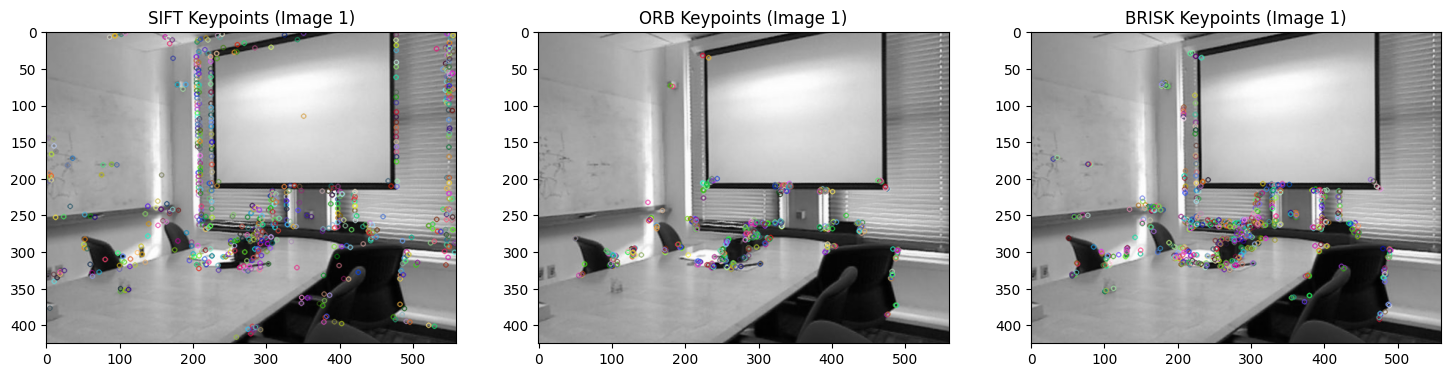

SIFT Keypoints (Image 1): 709
ORB Keypoints (Image 1): 500
BRISK Keypoints (Image 1): 623


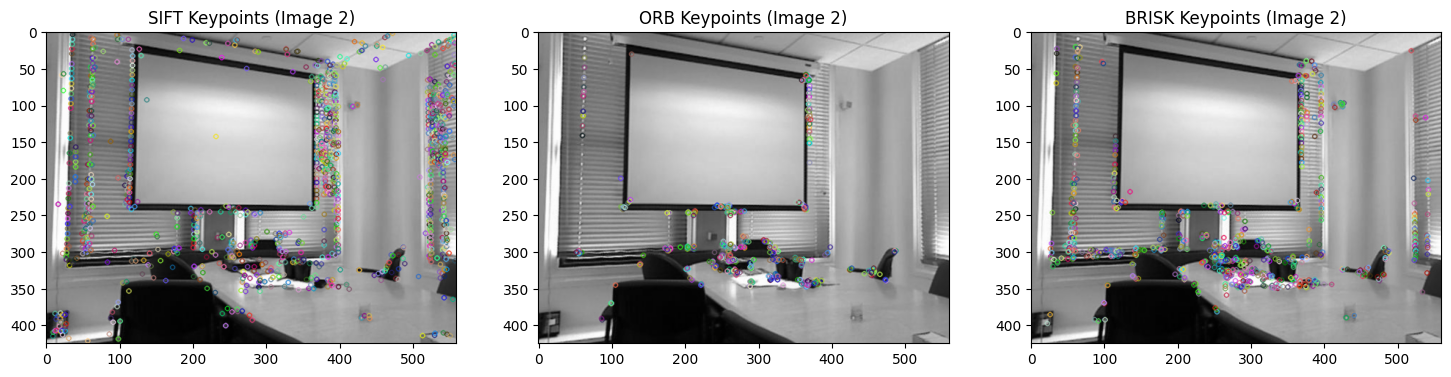

SIFT Keypoints (Image 2): 1304
ORB Keypoints (Image 2): 500
BRISK Keypoints (Image 2): 774


In [58]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('/content/drive/MyDrive/Images/Sample Images/c1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/Images/Sample Images/c2.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
orb = cv2.ORB_create()
brisk = cv2.BRISK_create()

keypoints_sift1, descriptors_sift1 = sift.detectAndCompute(image1, None)
keypoints_orb1, descriptors_orb1 = orb.detectAndCompute(image1, None)
keypoints_brisk1, descriptors_brisk1 = brisk.detectAndCompute(image1, None)

image1_sift = cv2.drawKeypoints(image1, keypoints_sift1, None)
image1_orb = cv2.drawKeypoints(image1, keypoints_orb1, None)
image1_brisk = cv2.drawKeypoints(image1, keypoints_brisk1, None)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('SIFT Keypoints (Image 1)')
plt.imshow(image1_sift, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('ORB Keypoints (Image 1)')
plt.imshow(image1_orb, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('BRISK Keypoints (Image 1)')
plt.imshow(image1_brisk, cmap='gray')
plt.show()

print("SIFT Keypoints (Image 1):", len(keypoints_sift1))
print("ORB Keypoints (Image 1):", len(keypoints_orb1))
print("BRISK Keypoints (Image 1):", len(keypoints_brisk1))

keypoints_sift2, descriptors_sift2 = sift.detectAndCompute(image2, None)
keypoints_orb2, descriptors_orb2 = orb.detectAndCompute(image2, None)
keypoints_brisk2, descriptors_brisk2 = brisk.detectAndCompute(image2, None)

image2_sift = cv2.drawKeypoints(image2, keypoints_sift2, None)
image2_orb = cv2.drawKeypoints(image2, keypoints_orb2, None)
image2_brisk = cv2.drawKeypoints(image2, keypoints_brisk2, None)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('SIFT Keypoints (Image 2)')
plt.imshow(image2_sift, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('ORB Keypoints (Image 2)')
plt.imshow(image2_orb, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('BRISK Keypoints (Image 2)')
plt.imshow(image2_brisk, cmap='gray')
plt.show()

print("SIFT Keypoints (Image 2):", len(keypoints_sift2))
print("ORB Keypoints (Image 2):", len(keypoints_orb2))
print("BRISK Keypoints (Image 2):", len(keypoints_brisk2))


Q2) Feature Matching

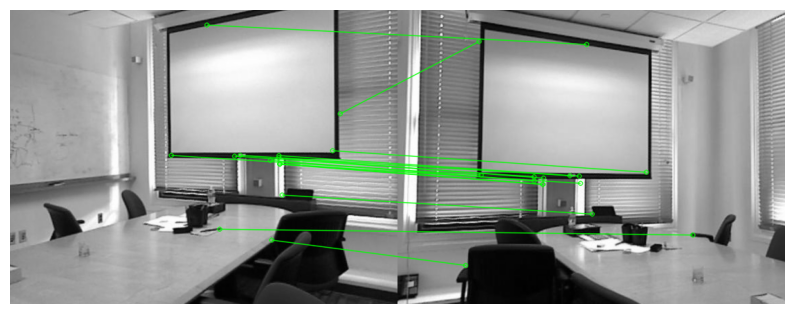

In [59]:
import numpy as np

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors_sift1,descriptors_sift2,k=2)


good = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append(m)

MIN_MATCH_COUNT = 3

if len(good)>MIN_MATCH_COUNT:
    p1 = np.float32([ keypoints_sift1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    p2 = np.float32([ keypoints_sift2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

draw_params = dict(matchColor = (0,255,0), singlePointColor = None, flags = 2)
img_siftmatch = cv2.drawMatches(image1,keypoints_sift1,image2,keypoints_sift2,good,None,**draw_params)

img_siftmatch_rgb = cv2.cvtColor(img_siftmatch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_siftmatch_rgb)
plt.axis('off')
plt.show()

Q3)Essential Matrix

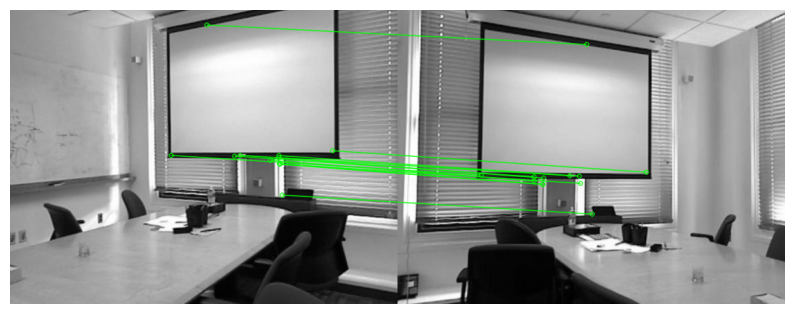

Essential matrix:
[[ 0.00077292  0.1890855  -0.0100996 ]
 [-0.2275826   0.03731325 -0.66814203]
 [ 0.02697248  0.68016977  0.03443479]]


In [60]:
counter = 0

K = np.array([[518.86, 0., 285.58],
              [0., 519.47, 213.74],
              [0.,   0.,   1.]])

img1=cv2.imread('/content/drive/MyDrive/Images/Sample Images/c1.png')
img2=cv2.imread('/content/drive/MyDrive/Images/Sample Images/c2.png')

E, mask = cv2.findEssentialMat(p1, p2, K, cv2.RANSAC, 0.999, 1.0);
matchesMask = mask.ravel().tolist()
draw_params = dict(matchColor = (0,255,0), singlePointColor = None,matchesMask = matchesMask,flags = 2)
img_inliermatch = cv2.drawMatches(image1,keypoints_sift1,image2,keypoints_sift2,good,None,**draw_params)

img_inliermatch_rgb = cv2.cvtColor(img_inliermatch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_inliermatch_rgb)
plt.axis('off')
plt.show()

print("Essential matrix:")
print(E)

In [61]:

points, R, t, mask = cv2.recoverPose(E, p1, p2)
print("Rotation:")
print(R)
print("Translation:")
print(t)
p1_tmp = np.ones([3, p1.shape[0]])
p1_tmp[:2,:] = np.squeeze(p1).T
p2_tmp = np.ones([3, p2.shape[0]])
p2_tmp[:2,:] = np.squeeze(p2).T

print((np.dot(R, p2_tmp) + t) - p1_tmp)

Rotation:
[[ 0.99825512 -0.00721088 -0.0586064 ]
 [ 0.01028163  0.99858033  0.05226487]
 [ 0.05814633 -0.05277624  0.99691207]]
Translation:
[[ 0.96347711]
 [-0.02828808]
 [-0.26629239]]
[[-113.18797186  -11.24173035  121.58897498 -128.44413952  -84.75111112
  -180.09764783 -281.6617493  -178.63538464 -127.34546247 -126.77140593
  -181.19445029 -181.19445029 -113.50455824 -108.07200689 -358.94115181]
 [  29.16938162   30.75142272   12.35055863   31.41094631   31.56055746
    31.35801351   37.00592186   31.22382314   31.83940171   30.17959349
    31.12718813   31.12718813   29.8880538    34.47256016 -102.91674543]
 [  -5.86616837   12.92566139    7.36261683   -1.55473489    1.54125851
    -1.86231466  -14.04710592   -0.86162882    2.29565054    1.85575047
    -1.39334736   -1.39334736    0.50268141    8.22178057    4.11215661]]


Q4)3D Visualization

In [62]:

M_r = np.hstack((R, t))
M_l = np.hstack((np.eye(3, 3), np.zeros((3, 1))))

P_l = np.dot(K,  M_l)
P_r = np.dot(K,  M_r)

p1 = p1[np.asarray(matchesMask)==1,:,:]
p2 = p2[np.asarray(matchesMask)==1,:,:]
p1_un = cv2.undistortPoints(p1,K,None)
p2_un = cv2.undistortPoints(p2,K,None)
p1_un = np.squeeze(p1_un)
p2_un = np.squeeze(p2_un)

point_4d_hom = cv2.triangulatePoints(P_l, P_r, p1_un.T, p2_un.T)
point_3d = point_4d_hom / np.tile(point_4d_hom[-1, :], (4, 1))
point_3d = point_3d[:3, :].T



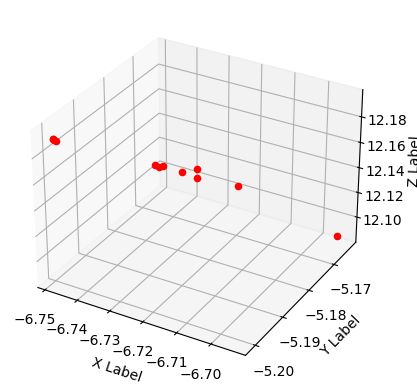

In [63]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
for x, y, z in point_3d:
    ax.scatter(x, y, z, c="r", marker="o")
plt.show()

In [64]:

with open('3D_Object'+ '.obj', 'w') as f:
    for x, y, z in point_3d:
        f.write(f"v {x} {y} {z}\n")
fig.savefig('3D_Plot'+ '.jpg')